---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
def answer_one():
    # Load dataset:
    df = pd.read_csv('fraud_data.csv')
    # Return percentage of fraud data:
    return df[df['Class']==1].shape[0] / df.shape[0]

# Testing:
#answer_one()

0.016410823768035772

In [4]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    ## Import Libraries ##
    
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    ## Dummy Classifier ##
    
    # Create dummy object and fit to the training data:
    dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    # Make prediction on test set:
    pred = dummy.predict(X_test)
    
    # Calculate accuracy:
    accuracy = dummy.score(X_test, y_test)
    # Calculate recall:
    recall = recall_score(y_test, pred)
    # Return test accuracy and recall:
    return accuracy, recall

# Testing:
#answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    ## Import Libraries ##
    
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    ## SVM Classifier ##
    
    # Create and fit SVC model with default parameters:
    svc = SVC().fit(X_train, y_train)
    
    # Make prediction on test set:
    pred = svc.predict(X_test)
    
    # Calculate accuracy:
    accuracy = svc.score(X_test, y_test)
    # Calculate recall:
    recall = recall_score(y_test, pred)
    # Calculate precision:
    precision = precision_score(y_test, pred)
    
    # Return calculated metrics:
    return accuracy, recall, precision

# Testing:
#answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [8]:
def answer_four():
    ## Import Libraries ##
    
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    ## SVM Classifier ##
    
    # Create and fit model on training data:
    svc = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    
    # Make prediction on test set:
    pred = svc.predict(X_test)
    
    # Create confusion matrix for test set prediction:
    conf_mat = confusion_matrix(y_test, pred)
    # Return confusion matrix:
    return conf_mat

# Testing:
#answer_four()

array([[5340,    4],
       [  16,   64]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [26]:
def answer_five():
    ## Import Libraries ##
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    #import matplotlib.pyplot as plt
    
    
    ## Logistic Regression ##
    
    # Create and fit logistic regression model on training data:
    log_reg = LogisticRegression().fit(X_train, y_train)
    # Obtain decision function values on test set to estimate probability:
    decision = log_reg.decision_function(X_test)
    
    # Calculate precision-recall curve values:
    precision, recall, _ = precision_recall_curve(y_test, decision)
    # Calculate ROC curve values:
    fpr, tpr, _ = roc_curve(y_test, decision)
    
    
    ## Visualizations ##
    
    # Precision-Recall Curve:
    #plt.figure()
    #plt.xlim([0.0, 1.01])
    #plt.ylim([0.0, 1.01])
    #plt.plot(precision, recall)
    #plt.title('Precision-Recall Curve')
    #plt.xlabel('Precision')
    #plt.ylabel('Recall')
    #plt.axes().set_aspect('equal')
    #plt.show()

    # ROC Curve:
    #plt.figure()
    #plt.xlim([-0.01, 1.00])
    #plt.ylim([-0.01, 1.01])
    #plt.plot(fpr, tpr, lw=3)
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('ROC curve')
    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.axes().set_aspect('equal')
    #plt.show()
    
    # Based on the visualizations, return desired values:
    desired_recall = recall[list(precision).index(0.75)]
    desired_tpr = tpr[27] #manually analysing the list, this is the index for the approximate desired value
    return desired_recall, desired_tpr

# Testing:
#answer_five()

(0.82499999999999996, 0.94999999999999996)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [32]:
def answer_six():
    ## Import Libraries ##
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    ## Grid Search ##
    
    # Create grid search on logistic regression model:
    grid = GridSearchCV(LogisticRegression(), {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}).fit(X_train, y_train)
    
    # Return mean test scores in the desired format:
    return grid.cv_results_['mean_test_score'].reshape(5, 2)

# Testing:
#answer_six()

array([[ 0.99422214,  0.99539001],
       [ 0.99606614,  0.99618907],
       [ 0.99606614,  0.9961276 ],
       [ 0.99588174,  0.9959432 ],
       [ 0.99588174,  0.99588174]])

<IPython.core.display.Javascript object>


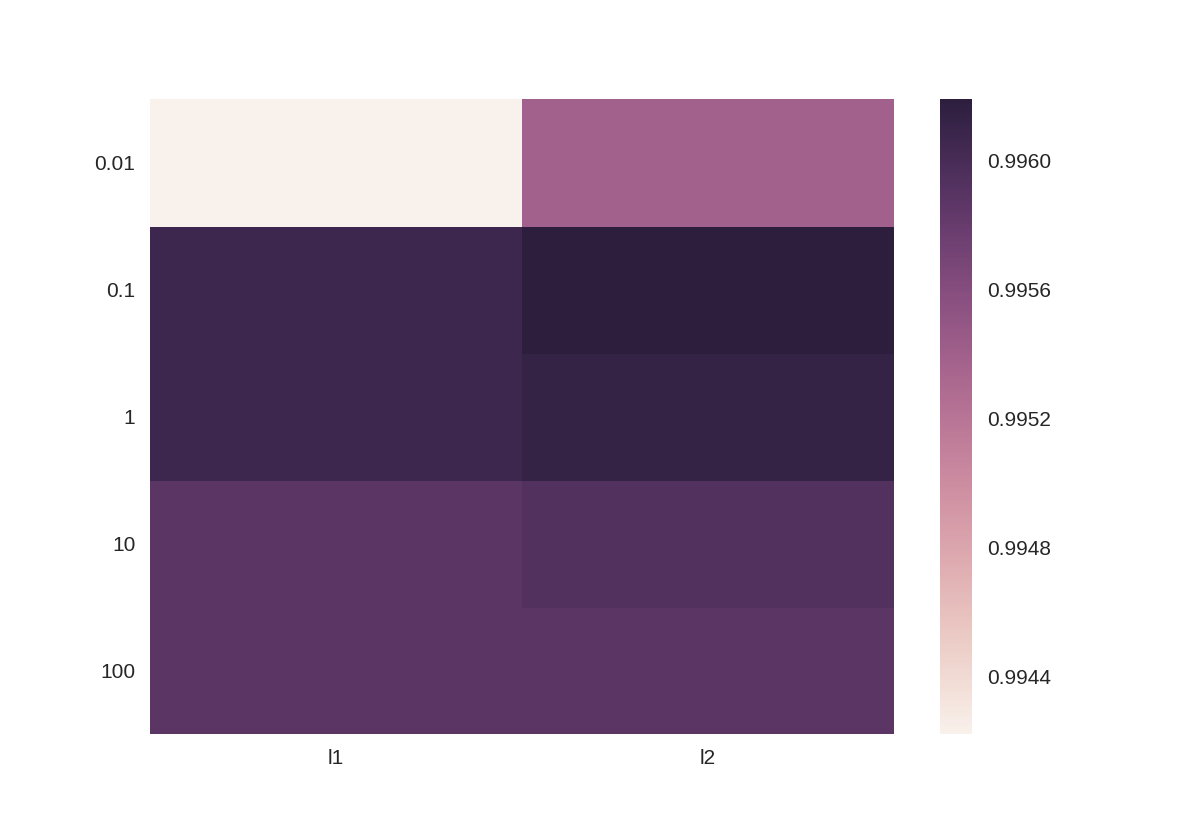

In [33]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())